In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import datetime
%matplotlib inline
plt.rcParams['font.sans-serif']=['SimHei']#将pyplot的字体改为可以支持中文的SimHei
plt.rcParams['axes.unicode_minus']=True#是否可以显示负号

In [2]:
card=pd.read_csv('card.csv',encoding='gbk')
clients=pd.read_csv('clients.csv',encoding='gbk')
disp=pd.read_csv('disp.csv',encoding='gbk')

In [3]:
#card_id和disp_id是一对一
card.head()

,card_id,disp_id,issued,type
0,1005,9285,1993-11-07,普通卡
1,104,588,1994-01-19,普通卡
2,747,4915,1994-02-05,普通卡
3,70,439,1994-02-08,普通卡
4,577,3687,1994-02-15,普通卡


In [4]:
clients.head()

,client_id,sex,birth_date,district_id
0,1,女,1970-12-13,18
1,2,男,1945-02-04,1
2,3,女,1940-10-09,1
3,4,男,1956-12-01,5
4,5,女,1960-07-03,5


In [5]:
disp.head()

,disp_id,client_id,account_id,type
0,1,1,1,所有者
1,2,2,2,所有者
2,3,3,2,用户
3,4,4,3,所有者
4,5,5,3,用户


In [6]:
df1=card.merge(disp,on='disp_id',how='left').merge(clients,on='client_id',how='left')

In [7]:
df1.shape

(892, 10)

In [8]:
df1['issued']=pd.to_datetime(df1.issued)
df1['birth_date']=pd.to_datetime(df1.birth_date)

In [9]:
df1.groupby('account_id').account_id.count().count()

892

## 0.总体发卡趋势&不同卡类型占比

In [15]:
df1['issued_year']=df1['issued'].map(lambda x:x.year)

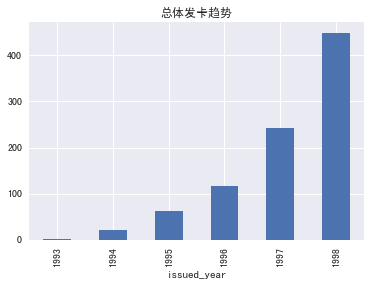

In [36]:
df1.groupby('issued_year').disp_id.count().plot(kind='bar',title='总体发卡趋势')

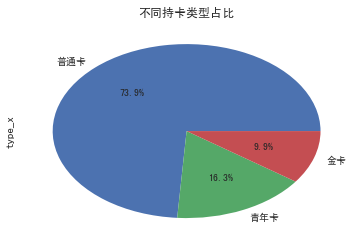

In [37]:
df1['type_x'].value_counts().plot(kind='pie',autopct='%.1f%%',title='不同持卡类型占比')

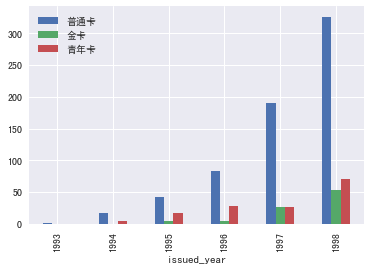

In [46]:
df1.groupby('issued_year').apply(lambda x:x.type_x.value_counts()).unstack().plot(kind='bar')

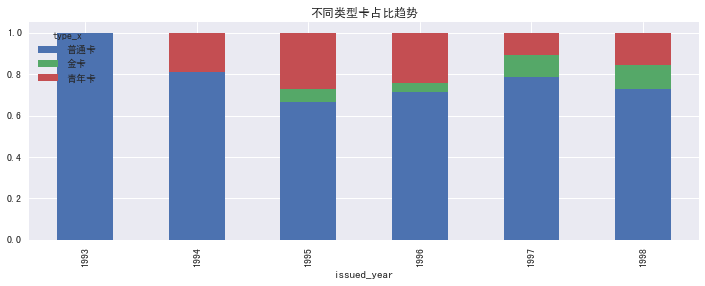

In [72]:
crosstab_typeyear=pd.crosstab(df1.issued_year,df1.type_x)
crosstab_typeyear.apply(lambda x:x/x.sum(),axis=1).plot(kind='bar',stacked=True,figsize=(12,4))
plt.title('不同类型卡占比趋势')

In [63]:
#df1.groupby('issued_year').apply(lambda x:x.type_x.value_counts()/x.type_x.count()).\
#unstack().plot(kind='bar',stacked=True,figsize=(12,4))

In [83]:
crosstab_typeyear

type_x,普通卡,金卡,青年卡
issued_year,,,
1993,1,0,0
1994,17,0,4
1995,42,4,17
1996,83,5,28
1997,190,26,26
1998,326,53,70


In [79]:
crosstab_typeyear.columns.values

array(['普通卡', '金卡', '青年卡'], dtype=object)

In [91]:
#crosstab_typeyear.plot.area()

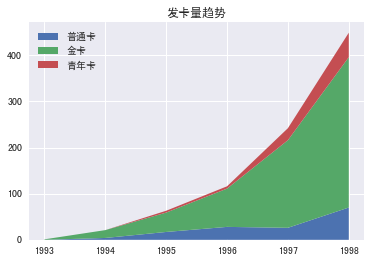

In [90]:
plt.stackplot(crosstab_typeyear.index,crosstab_typeyear.青年卡,crosstab_typeyear.普通卡,crosstab_typeyear.金卡,
             labels=crosstab_typeyear.columns.values)
plt.legend(loc='upper left')
plt.title('发卡量趋势')

## 1. 不同类型卡的持卡人的性别对比

In [50]:
pd.crosstab(df1.type_x,df1.sex)

sex,女,男
type_x,,
普通卡,317,342
金卡,35,53
青年卡,71,74


In [51]:
pd.crosstab(df1.type_x,df1.sex).apply(lambda x:x/x.sum(),axis=1)

sex,女,男
type_x,,
普通卡,0.481032,0.518968
金卡,0.397727,0.602273
青年卡,0.489655,0.510345


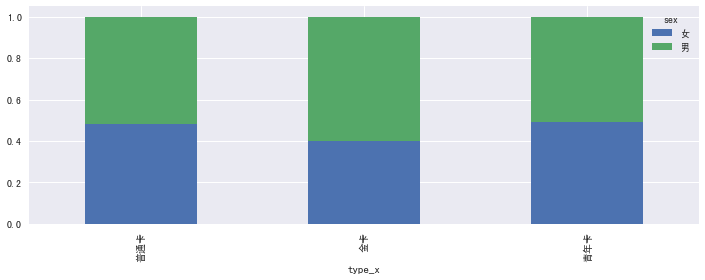

In [52]:
pd.crosstab(df1.type_x,df1.sex).apply(lambda x:x/x.sum(),axis=1).plot.bar(stacked=True,figsize=(12,4))

金卡的男性占比明显更高

## 2.不同类型卡的持卡人在办卡时的平均年龄对比

In [53]:
df1['begin_age']=(df1['issued']-df1['birth_date'])/np.timedelta64(1,'Y')

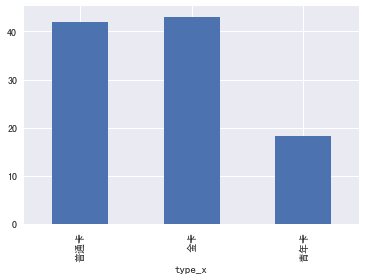

In [54]:
df1.groupby('type_x').begin_age.mean().plot.bar()

办金卡的平均年龄最高，其次是普通卡，然后是青年卡

# 3. 不同类型卡的持卡人在办卡前一年内的平均帐户余额对比

In [92]:
trans=pd.read_csv('trans.csv',encoding='gbk')

/Users/xucoolboy/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [106]:
trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1056320 entries, 0 to 1056319
Data columns (total 10 columns):
trans_id      1056320 non-null int64
account_id    1056320 non-null int64
date          1056320 non-null object
type          1056320 non-null object
operation     873206 non-null object
amount        1056320 non-null object
balance       1056320 non-null object
k_symbol      521006 non-null object
bank          273508 non-null object
account       295389 non-null float64
dtypes: float64(1), int64(2), object(7)
memory usage: 80.6+ MB


In [58]:
trans.k_symbol.value_counts()

利息所得    184691
支票      155832
房屋贷款    118065
养老金      30338
保险费      18500
支付贷款     13580
Name: k_symbol, dtype: int64

In [93]:
df1=df1.merge(trans,on='account_id',how='left')

In [60]:
df1.shape

(221938, 20)

In [61]:
df1.head()

,card_id,disp_id,issued,type_x,client_id,account_id,type_y,sex,birth_date,district_id,begin_age,trans_id,date,type,operation,amount,balance,k_symbol,bank,account
0,1005,9285,1993-11-07,普通卡,9593,7753,所有者,女,1968-01-28,74,25.777394,2349697,1993-02-08,贷,信贷资金,$600,$600,NaN,NaN,NaN
1,1005,9285,1993-11-07,普通卡,9593,7753,所有者,女,1968-01-28,74,25.777394,2349709,1993-02-12,贷,信贷资金,$19588,$20188,NaN,NaN,NaN
2,1005,9285,1993-11-07,普通卡,9593,7753,所有者,女,1968-01-28,74,25.777394,2349705,1993-02-12,贷,信贷资金,$27078,$47266,NaN,NaN,NaN
3,1005,9285,1993-11-07,普通卡,9593,7753,所有者,女,1968-01-28,74,25.777394,3492040,1993-02-28,贷,NaN,$120,$47386,利息所得,NaN,NaN
4,1005,9285,1993-11-07,普通卡,9593,7753,所有者,女,1968-01-28,74,25.777394,2350078,1993-03-10,借,现金,$12000,$35386,NaN,NaN,NaN


In [94]:
df1['amount']=df1.amount.str.replace('[$,]','').astype('int')
df1['balance']=df1.balance.str.replace('[$,]','').astype('int')

In [95]:
df1['date']=pd.to_datetime(df1['date'])

In [96]:
df1.head()

,card_id,disp_id,issued,type_x,client_id,account_id,type_y,sex,birth_date,district_id,issued_year,trans_id,date,type,operation,amount,balance,k_symbol,bank,account
0,1005,9285,1993-11-07,普通卡,9593,7753,所有者,女,1968-01-28,74,1993,2349697,1993-02-08,贷,信贷资金,600,600,NaN,NaN,NaN
1,1005,9285,1993-11-07,普通卡,9593,7753,所有者,女,1968-01-28,74,1993,2349709,1993-02-12,贷,信贷资金,19588,20188,NaN,NaN,NaN
2,1005,9285,1993-11-07,普通卡,9593,7753,所有者,女,1968-01-28,74,1993,2349705,1993-02-12,贷,信贷资金,27078,47266,NaN,NaN,NaN
3,1005,9285,1993-11-07,普通卡,9593,7753,所有者,女,1968-01-28,74,1993,3492040,1993-02-28,贷,NaN,120,47386,利息所得,NaN,NaN
4,1005,9285,1993-11-07,普通卡,9593,7753,所有者,女,1968-01-28,74,1993,2350078,1993-03-10,借,现金,12000,35386,NaN,NaN,NaN


In [114]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 221938 entries, 0 to 221937
Data columns (total 20 columns):
card_id        221938 non-null int64
disp_id        221938 non-null int64
issued         221938 non-null datetime64[ns]
type_x         221938 non-null object
client_id      221938 non-null int64
account_id     221938 non-null int64
type_y         221938 non-null object
sex            221938 non-null object
birth_date     221938 non-null datetime64[ns]
district_id    221938 non-null int64
begin_age      221938 non-null float64
trans_id       221938 non-null int64
date           221938 non-null datetime64[ns]
type           221938 non-null object
operation      184845 non-null object
amount         221938 non-null int64
balance        221938 non-null int64
k_symbol       97509 non-null object
bank           45855 non-null object
account        56768 non-null float64
dtypes: datetime64[ns](3), float64(2), int64(8), object(7)
memory usage: 35.6+ MB


In [103]:
df2=df1[(df1.issued>df1.date)&((df1.issued-df1.date)<np.timedelta64(365,'D'))].\
groupby(['type_x','card_id']).balance.agg('mean').reset_index()

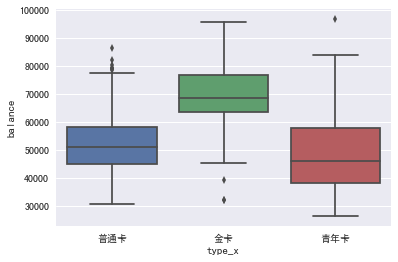

In [104]:
sns.boxplot(x='type_x',y='balance',data=df2)

## 4、不同类型卡的持卡人在办卡前一年内的平均收入对比

In [107]:
df3=df1[(df1.issued>df1.date)&((df1.issued-df1.date)<np.timedelta64(365,'D'))].groupby(['type_x','card_id','type']).\
amount.agg('sum').reset_index()

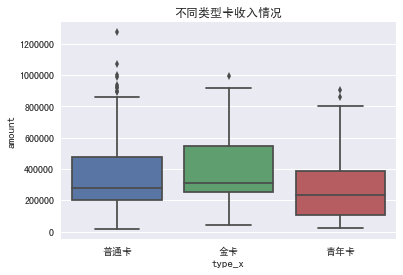

In [108]:
sns.boxplot(x='type_x',y='amount',data=df3.query("(type=='贷')&(amount<1500000)"))
plt.title('不同类型卡收入情况')

## 5、不同类型卡的持卡人在办卡前一年内的支出对比

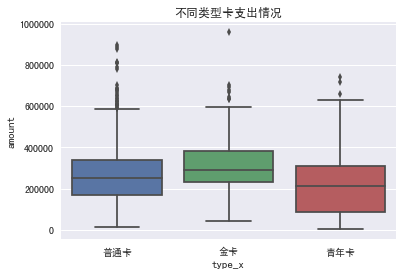

In [109]:
sns.boxplot(x='type_x',y='amount',data=df3.query("(type=='借')&(amount<1400000)"))
plt.title('不同类型卡支出情况')